### Requirements and questions ###

**Exploratory Analysis**
<ul>
<li>Are three any correlation between features? why or why not? </li>
<li>Are there any outliers in the dataset? why or why not? </li>
<li>Are there any normalization needed? why or why not?</li>
<li>Are there any missing values? Why or why not?</li>
</ul>

**Classification**
<ul>
<li>Expriment the following algorithms/models: decision tree, random forest, adaboost, KNN, SVM, MLP, and Naive Baye</li>
<Li>For each model, train-test-split with 80% for training and 20% for testing.</li>
<li>For each algorithm, output the following performance meaures: accuracy, precision, and recall</li>
</ul>

**Visualization**
<ul>
<li>Pick at least one visualization for model perfomance comparison.
</ul>

**Reflection**
<ul>
<li>What is the best K in KNN? Only consider k in the range of 1-15. Use odd numbers only.</li>
<li>What is the most important features found by decision tree and random forest? (optional)</li>
<li>Which algorithm has the highest accuracy? Is there a model overfitting for this algorithm? Why or why not?Perform 10-fold cross-validation with this algorithm and report the accuracy, precision and recall. </li>
</ul>

In [8]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import ensemble
from sklearn.metrics import accuracy_score
import pydotplus
from IPython.display import Image

In [9]:
# Import Iris Dataset
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
iris = fetch_ucirepo(id=53)
  
# data (as pandas dataframes) 
DataFeatures = iris.data.features 
DataTargets = iris.data.targets

# create Pandas dataframe of merged data, iris is not a DataFrame
iris_merged_df = pd.merge(DataFeatures,DataTargets, right_index=True, left_index=True)

### Exploratory Analysis

Will take a look at the data, pull up statistical analysis and see if there is anything missing or null.

In [10]:
iris_merged_df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
iris_merged_df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
print('Number of missing values by column:')
print(iris_merged_df.isna().sum())

print("\nTotal number of missing values = %d" % (iris_merged_df.isna().sum().sum()))

print('\nNumber of instances = %d' % (iris_merged_df.shape[0]))
print('Number of attributes = %d' % (iris_merged_df.shape[1]))

Number of missing values by column:
sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

Total number of missing values = 0

Number of instances = 150
Number of attributes = 5


There are no null or missing data.  Next, a quick visualization of the data to look at any correlations

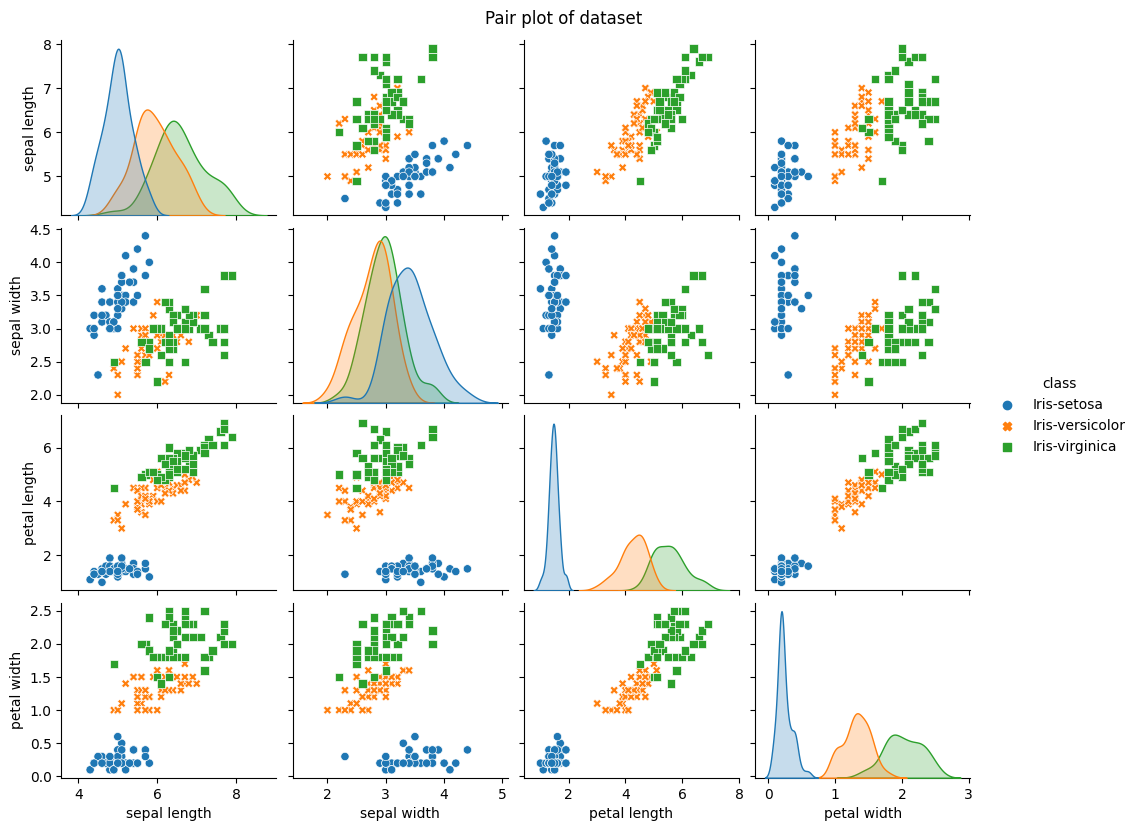

In [13]:
# Visualize entire dataset using Seaborn
# Surpress warnings to free up physical space on printed assignment, source: (https://stackoverflow.com/questions/15777951/how-to-suppress-pandas-future-warning)

with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    g = sns.pairplot(iris_merged_df, hue='class', markers=['o','X','s'])
    g.fig.set_figheight(8)
    g.fig.suptitle('Pair plot of dataset', y=1.02)

In [17]:
correlation_iris_merged_df = iris_merged_df.corr(numeric_only=True)
correlation_iris_merged_df

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


There is a strong correlation between petal width and petal length with a value of 0.962757.  Petal length and sepal length are slightly correlated at 0.871754.